## Demo code for Principal Components Analysis (PCA)

We'll use this notebook to demonstrate PCA on some toy data and image data.


In [1]:
import os, gzip
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

## Toy data examples

This is the code used to generate some of the first examples in the lecture slides.


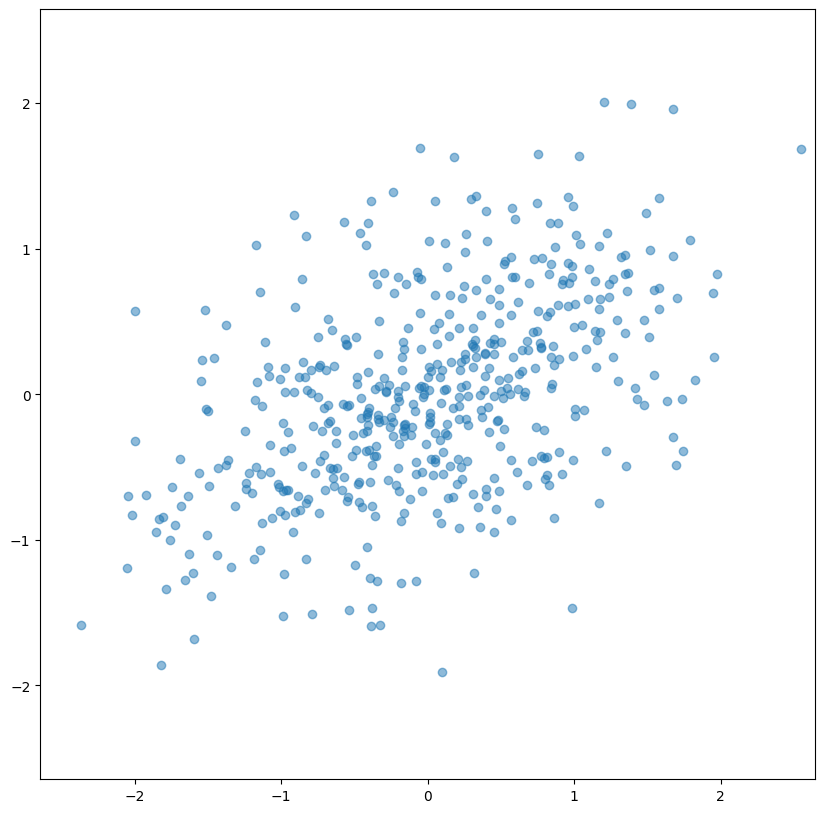

In [3]:
n = 500
X = np.matrix(np.random.normal(loc=0,size=2*n))
X = X.reshape(n, 2)
scale = .5
X[:,1] = scale * X[:,1]
theta = np.pi/6
R = np.matrix([np.cos(theta), np.sin(theta), -np.sin(theta), np.cos(theta)]).reshape(2,2)
X = X * R
X = np.asarray(X)
X[:,0] = X[:,0] - np.mean(X[:,0])
X[:,1] = X[:,1] - np.mean(X[:,1])
plt.figure(figsize=(10,10))
plt.scatter(np.array(X[:,0]), np.array(X[:,1]), alpha=.5)
lim = np.max(np.abs(X))+.1
plt.xlim(-lim,lim)
_ = plt.ylim(-lim,lim)

In [4]:
pca = PCA().fit(X)
principal_vectors = pca.components_
principal_vectors[0]
print(pca.explained_variance_)

[0.9427077  0.29083697]


In [5]:
principal_vectors

array([[ 0.84807282,  0.52987969],
       [ 0.52987969, -0.84807282]])

(-2.644423606028501, 2.644423606028501)

<Figure size 640x480 with 0 Axes>

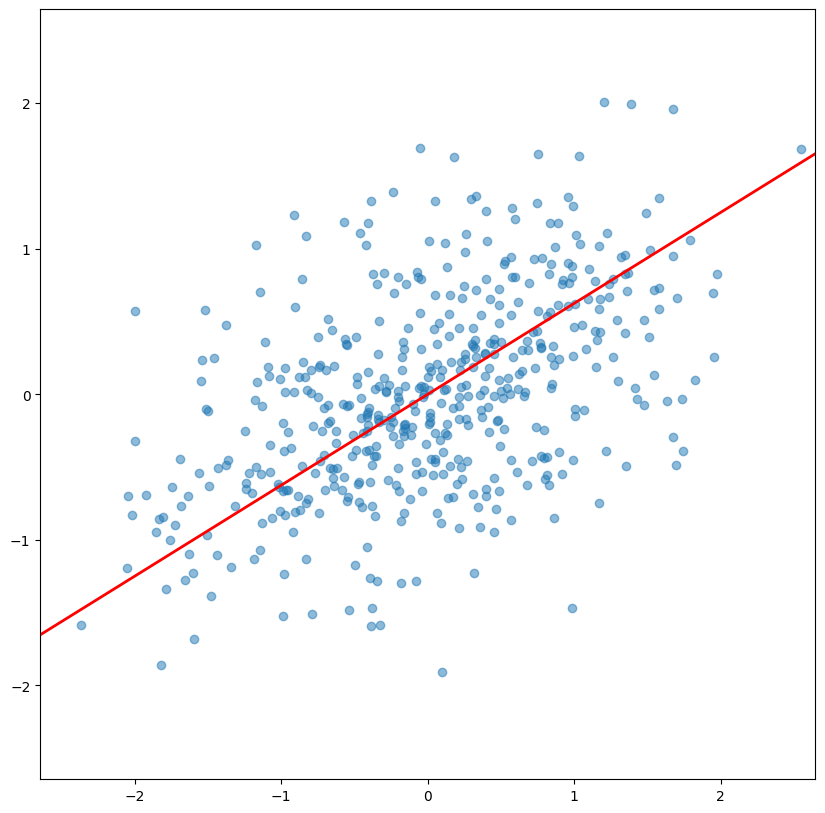

In [6]:
pc1 = principal_vectors[0]
slope = pc1[1]/pc1[0]
plt.figure()
plt.figure(figsize=(10,10))
plt.scatter(np.array(X[:,0]), np.array(X[:,1]), alpha=.5)
plt.plot([lim, -lim], [lim*slope, -lim*slope], color = 'r', linewidth=2)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

In [7]:
principal_vectors

array([[ 0.84807282,  0.52987969],
       [ 0.52987969, -0.84807282]])

In [ ]:
# let's check that the principal vectors are orthogonal
np.dot(principal_vectors[0], principal_vectors[1])

## Fashion MNIST

Next we'll run PCA on Fashion MNIST data.
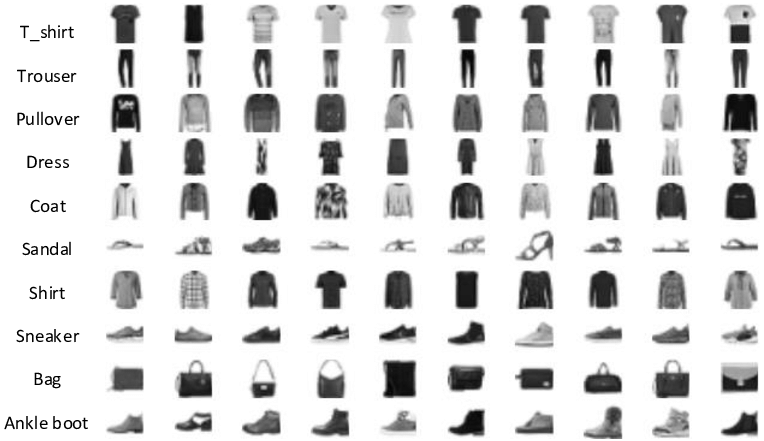

We'll import the data from tensorflow.


In [ ]:
# Define function that is used to read mnist and fashion mnist data

def load_data(dataset_name):
    data_dir = os.path.join("./", dataset_name)

    def extract_data(filename, num_data, head_size, data_size):
        with gzip.open(filename) as bytestream:
            bytestream.read(head_size)
            buf = bytestream.read(data_size * num_data)
            data = np.frombuffer(buf, dtype=np.uint8).astype(np.float)
        return data

    data = extract_data(data_dir + '/train-images-idx3-ubyte.gz', 60000, 16, 28 * 28)
    trX = data.reshape((60000, 28, 28))

    data = extract_data(data_dir + '/train-labels-idx1-ubyte.gz', 60000, 8, 1)
    trY = data.reshape((60000))

    data = extract_data(data_dir + '/t10k-images-idx3-ubyte.gz', 10000, 16, 28 * 28)
    teX = data.reshape((10000, 28, 28))

    data = extract_data(data_dir + '/t10k-labels-idx1-ubyte.gz', 10000, 8, 1)
    teY = data.reshape((10000))

    trY = np.asarray(trY)
    teY = np.asarray(teY)

    X = np.concatenate((trX, teX), axis=0)
    y = np.concatenate((trY, teY), axis=0).astype(np.int)

    seed = 409
    np.random.seed(seed)
    np.random.shuffle(X)
    np.random.seed(seed)
    np.random.shuffle(y)
    return X / 255., y

In [ ]:
def plot_images(images, titles, h, w, n_row=3, n_col=4, reversed=False):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        if reversed:
            plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        else:
            plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray.reversed())
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


In [ ]:
# load data
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X = x_train
y = y_train
height, width = (28, 28)
names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 0s 0us/step


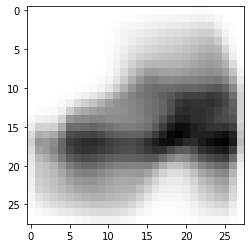

In [ ]:
images = X[(y==5), :]
avgimg = images.mean(0)
_ = plt.imshow(avgimg.reshape((28, 28)), cmap=plt.cm.gray.reversed())

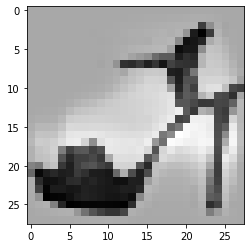

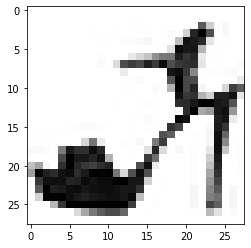

In [ ]:
cimages = np.subtract(images, avgimg)
_ = plt.imshow(cimages[1].reshape((28, 28)), cmap=plt.cm.gray.reversed())
plt.show()
_ = plt.imshow(np.add(cimages[1], avgimg).reshape((28, 28)), cmap=plt.cm.gray.reversed())

In [ ]:
height = cimages.shape[1]
width = cimages.shape[2]
cimages = cimages.reshape(cimages.shape[0], height*width)
cimages.shape

(6000, 784)

(6000, 100)
Variance explained by first 100 principal vectors: 86.50%


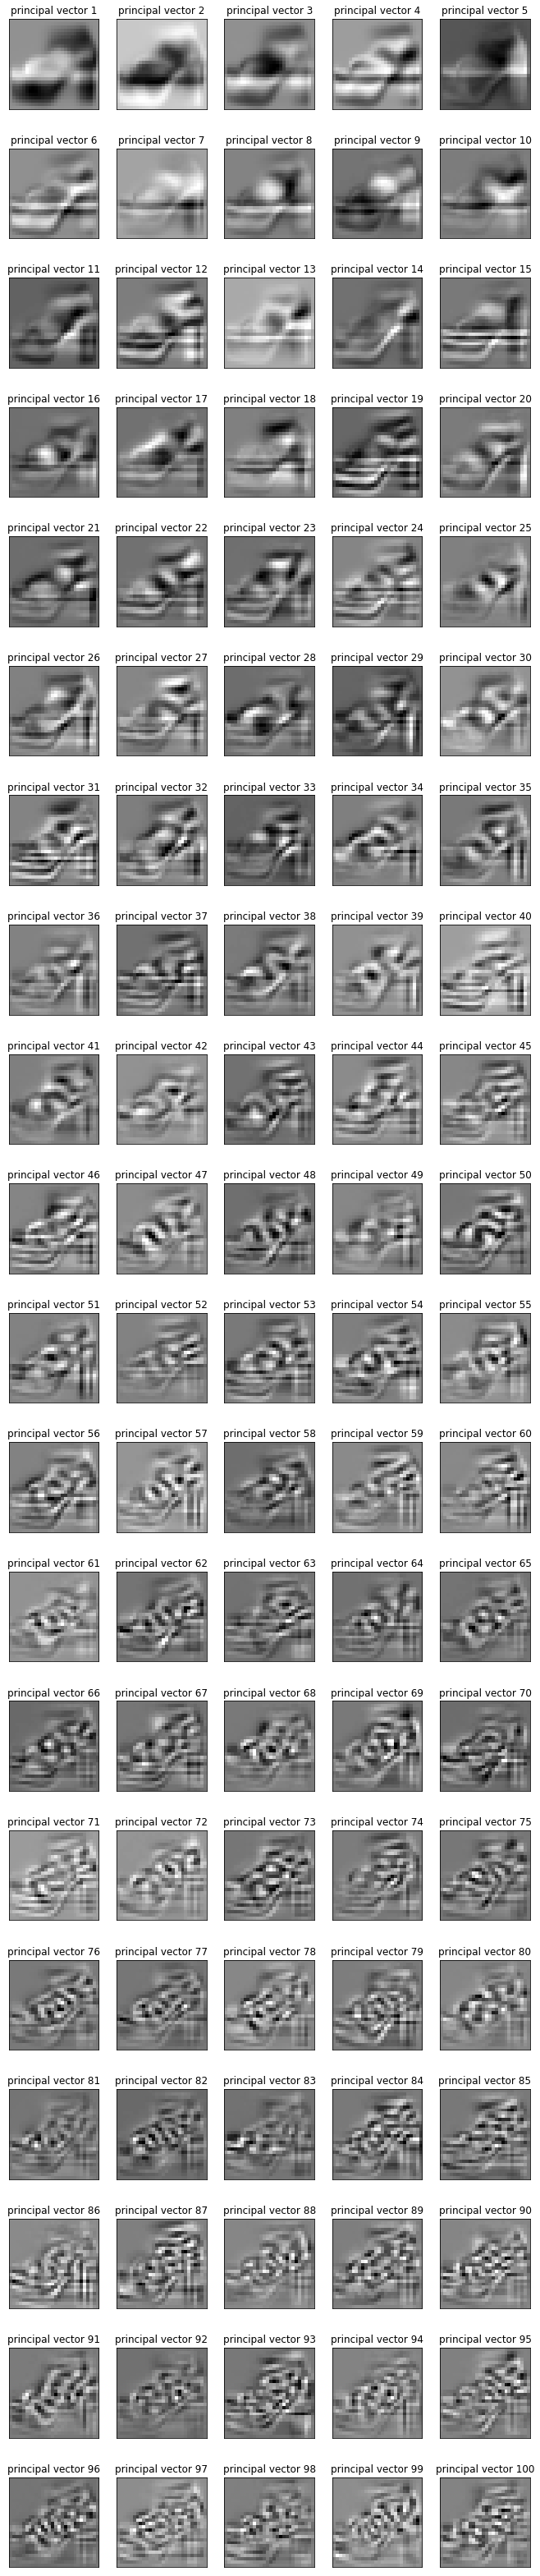

In [ ]:
num_components = 100
pca = PCA(num_components).fit(cimages)
principal_vectors = pca.components_.reshape((num_components, height, width))
pcs = pca.fit_transform(cimages)
print(pcs.shape)
labels = ['principal vector %d' % (i+1) for i in np.arange(num_components)]
plot_images(principal_vectors, labels, height, width, int(num_components/5.), 5)
ratio = pca.explained_variance_ratio_.sum()
print('Variance explained by first %d principal vectors: %.2f%%' % (num_components, ratio*100))

In [ ]:
capprox = pca.inverse_transform(pcs)
print(capprox.shape)
approx = np.add(capprox, avgimg.reshape(height*width))

(6000, 784)


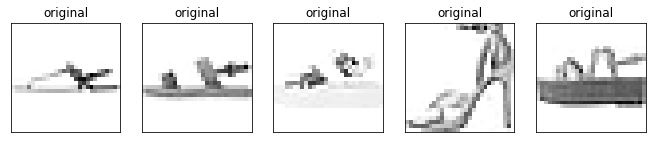

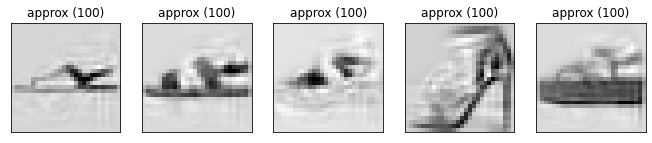

In [ ]:
num_samples = 5
sample = np.random.choice(images.shape[0], num_samples)
plot_images(images[sample,:], ['original' for i in range(num_samples)], height, width, 1, num_samples)
plot_images(approx[sample,:], ['approx (%d)' % num_components for i in range(5)], height, width, 1, num_samples)


**labels**:
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot